## gym 설치

In [ ]:
!pip install gymnasium

## 블랙잭

In [3]:
import gymnasium as gym

In [4]:
env = gym.make("Blackjack-v1")

In [5]:
obs, info = env.reset(seed=42) 
obs

(15, 2, 0)

In [6]:
action = env.action_space.sample() 
action

1

In [7]:
obs, reward, terminated, truncated, info = env.step(action) 
print(f'{obs=} {reward=} {terminated=} {truncated=}')

obs=(25, 2, 0) reward=-1.0 terminated=True truncated=False


In [21]:
import tqdm.autonotebook as tqdm # 진행 막대 표시 라이브러리 
import numpy as np # 수학계산 라이브러리
returns = [] # 수익 저장 
for i in tqdm.trange(100): # 100번 게임
    obs, info = env.reset()
    terminated = False 
    while not terminated: # 끝날 때까지 반복
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action) 
    else: # 끝나면
        returns.append(reward) # 마지막 보상을 수익으로 저장 
np.mean(returns) # 평균 수익

  0%|          | 0/100 [00:00<?, ?it/s]

0.45

## 객체지향 프로그래밍

In [11]:
class Animal:
    def __init__(self, name, age): # 생성자: self는 생성된 객체를 가리킴
        self.name = name # 객체의 name 속성 값을 설정
        self.age = age # 객체의 age 속성 값을 설정
    def make_sound(self): # 객체의 메서드(함수) 정의
        raise NotImplementedError # 사용시 구현되지 않았다는 에러 발생

In [12]:
a = Animal('똘똘이', 3)

In [13]:
a.age

3

In [14]:
a.make_sound()

NotImplementedError: 

In [15]:
class Dog(Animal): # Animal을 상속한 Dog를 정의
    def __init__(self, name, age, breed):
        super().__init__(name, age) # super() 함수로 객체의 부모 클래스에 접근 
        self.breed = breed # 자식 클래스의 속성을 설정
    def make_sound(self): # make sound 메서드를 새로 정의
        return f"{self.name} 멍멍"

In [16]:
d = Dog('바우', 5, '동네개')
d.make_sound()

'바우 멍멍'

## 밴딧 보행

In [17]:
class BanditWalk(gym.Env):
    def __init__(self):
        self.action_space = gym.spaces.Discrete(2) # 행동 공간 
        self.observation_space = gym.spaces.Discrete(3) # 관찰 공간 
        self.state = 1
    def reset(self):
        self.state = 1
        return self.state, {}
    def step(self, action):
        if action == 0:
            reward = 0 
            self.state = 0
        else:
            reward = 1 
            self.state = 2 
        return self.state, reward, True, False, {}    

In [ ]:
env = BanditWalk() # 환경만 새로 정의
# 아래 코드는 블랙잭 것을 그대로 복사해서 사용
returns = [] # 수익 저장 
for i in tqdm.trange(100): # 100번 게임
    obs, info = env.reset()
    terminated = False 
    while not terminated: # 끝날 때까지 반복
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action) 
    else: # 끝나면
        returns.append(reward) # 마지막 보상을 수익으로 저장 
np.mean(returns) # 평균 수익

## 밴딧 미끄러운 보행

In [22]:
class BanditSlipperyWalk(BanditWalk):
    def step(self, action):
        x = np.random.random() # 0~1 사이의 난수 발생 
        if action == 0:
            self.state = 0 if x < 0.8 else 2
        else:
            self.state = 2 if x < 0.8 else 0 
        reward = 0 if self.state == 0 else 1 
        return self.state, reward, True, False, {}

In [ ]:
env = BanditSlipperyWalk() # 환경만 새로 정의
# 아래 코드는 블랙잭 것을 그대로 복사해서 사용
returns = [] # 수익 저장 
for i in tqdm.trange(100): # 100번 게임
    obs, info = env.reset()
    terminated = False 
    while not terminated: # 끝날 때까지 반복
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action) 
    else: # 끝나면
        returns.append(reward) # 마지막 보상을 수익으로 저장 
np.mean(returns) # 평균 수익

## 유사 난수

In [ ]:
x = 42

In [52]:
x = (2**31 - 1) * x % 7**5
x

2835

In [53]:
7**5

16807

## 프로즌 레이크

In [ ]:
!pip install gymnasium[toy-text]

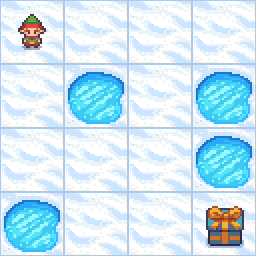

In [62]:
from PIL import Image
env = gym.make('FrozenLake-v1', render_mode="rgb_array") # new_step_api=True은 삭제
env.reset()
frame = env.render() # [0]은 삭제
Image.fromarray(frame)

In [63]:
env.reset() 
frames = []
frames.append(env.render()) # += 을 append로
terminated = False
while not terminated:
    action = env.action_space.sample() 
    obs, reward, terminated, truncated, info = env.step(action) 
    frames.append(env.render())  # += 을 append로

In [64]:
import imageio
filename = 'animation.gif' 
imageio.mimsave(filename, frames, fps=2)

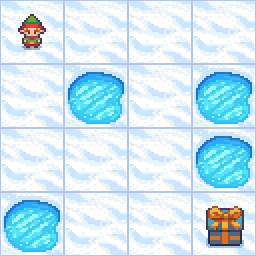

In [65]:
from IPython.display import Image 
Image(filename)